In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./brasil_real_estate.xlsx")

#### Data Wrangling

In [3]:
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [4]:
len(df)

12834

In [5]:
df.isna().sum()

property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

property_type              0
place_with_parent_names    0
region                     0
lat-lon                    0
area_m2                    0
price_usd                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   property_type            11551 non-null  object
 1   place_with_parent_names  11551 non-null  object
 2   region                   11551 non-null  object
 3   lat-lon                  11551 non-null  object
 4   area_m2                  11551 non-null  int64 
 5   price_usd                11551 non-null  object
dtypes: int64(1), object(5)
memory usage: 631.7+ KB


In [8]:
df[["lat","lon"]]=df["lat-lon"].str.split(",", expand=True).astype(float)
df.drop(columns=["lat-lon"], inplace=True)

In [9]:
splits = df["place_with_parent_names"].str.split("|", expand=True)

In [10]:
splits.head()

,0,1,2,3,4,5
0,,Brasil,Alagoas,Maceió,,None
1,,Brasil,Alagoas,Maceió,,None
2,,Brasil,Alagoas,Maceió,,None
3,,Brasil,Alagoas,Maceió,,None
4,,Brasil,Alagoas,Maceió,,None


In [11]:
splits.dropna(axis=1, inplace=True)
print(splits.nunique())

0      1
1      1
2     16
3    112
dtype: int64


In [12]:
df["place"]= splits.drop(columns=[0,1,2])
df.drop(columns=["place_with_parent_names"], inplace=True)

In [13]:
df["price_usd"] = df["price_usd"].str.replace(",","").str.replace("$","").astype(float)

In [14]:
df.head()

,property_type,region,area_m2,price_usd,lat,lon,place
0,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Maceió
1,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Maceió
2,house,Northeast,211,154465.45,-9.622703,-35.729795,Maceió
3,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Maceió
4,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Maceió


In [15]:
df.nunique()

property_type       2
region              5
area_m2           200
price_usd        2402
lat              4280
lon              4147
place             112
dtype: int64

In [16]:
df = df[(df["property_type"]=="apartment") & (df["region"]== "Northeast")]
df.head()

,property_type,region,area_m2,price_usd,lat,lon,place
0,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Maceió
1,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Maceió
3,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Maceió
4,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Maceió
5,apartment,Northeast,56,75727.07,-9.614414,-35.735621,Maceió


In [17]:
df.nunique()

property_type       1
region              1
area_m2           187
price_usd        1096
lat               973
lon               938
place              30
dtype: int64

In [18]:
df.drop(columns=["property_type","region"], inplace=True)

In [19]:
df.head()

,area_m2,price_usd,lat,lon,place
0,110,187230.85,-9.644305,-35.708814,Maceió
1,65,81133.37,-9.643093,-35.704840,Maceió
3,99,146013.20,-9.622837,-35.719556,Maceió
4,55,101416.71,-9.654955,-35.700227,Maceió
5,56,75727.07,-9.614414,-35.735621,Maceió


In [20]:
df.to_csv("brasil_real_estate_fixed.csv", index=None)

#### Exploratory Data Analysis

In [21]:
correlation_matrix=df.select_dtypes("number").corr()
correlation_matrix

,area_m2,price_usd,lat,lon
area_m2,1.000000,0.741579,-0.091623,-0.007157
price_usd,0.741579,1.000000,0.068892,0.011039
lat,-0.091623,0.068892,1.000000,-0.007918
lon,-0.007157,0.011039,-0.007918,1.000000


<Axes: >

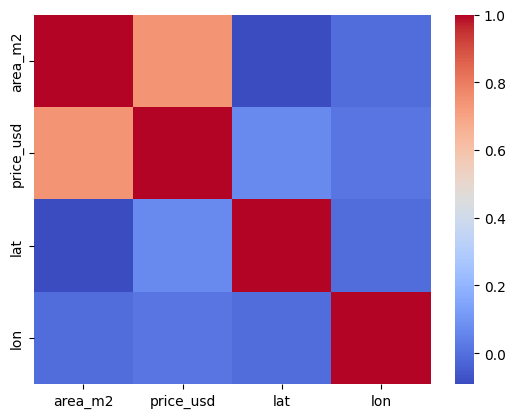

In [22]:
sns.heatmap(correlation_matrix, cmap="coolwarm")